# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time
import xgboost

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\plasma.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(315, 19)


,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,Target,SEX_Female,SEX_Male,SMOKSTAT_Current_Smoker,SMOKSTAT_Former,SMOKSTAT_Never,VITUSE_No,VITUSE_Yes_fairly_often,VITUSE_Yes_not_often
0,64,21.48380,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915,1,0,0,1,0,0,1,0
1,76,23.87631,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727,1,0,0,0,1,0,1,0
2,38,20.01080,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721,1,0,0,1,0,0,0,1
3,40,25.14062,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615,1,0,0,1,0,1,0,0
4,72,20.98504,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799,1,0,0,0,1,0,1,0


In [4]:
target = 'Target'

In [5]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols = list(cols)
cols.remove('Target')

<AxesSubplot:>

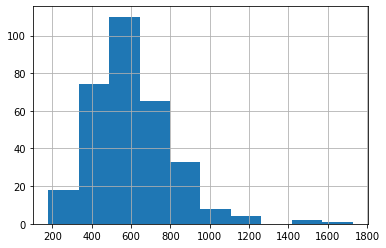

In [6]:
df[target].hist()

In [7]:
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()
#df[target] = lb_make.fit_transform(df[target])
#df[[target]].head(1)

# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [8]:
from PyImpetus import PPIMBR
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization
from sklearn.metrics import mean_squared_error

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.91. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [9]:
import featurewiz as fwiz

# Define the dataset and target here

In [10]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

18

In [11]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(315, 18) (315,)


In [12]:
y 

0      915
1      727
2      721
3      615
4      799
      ... 
310    216
311    328
312    502
313    684
314    826
Name: Target, Length: 315, dtype: int64

In [13]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(252, 18) (63, 18)


In [14]:
X_train

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,SEX_Female,SEX_Male,SMOKSTAT_Current_Smoker,SMOKSTAT_Former,SMOKSTAT_Never,VITUSE_No,VITUSE_Yes_fairly_often,VITUSE_Yes_not_often
102,69,25.23171,1756.4,82.3,8.8,0.0,500.3,2354,842,34,0,1,0,1,0,1,0,0
16,62,25.90246,1751.1,80.7,8.4,14.1,160.3,2194,242,235,0,1,0,1,0,0,1,0
0,64,21.48380,1298.8,57.0,6.3,0.0,170.3,1945,890,200,1,0,0,1,0,0,1,0
139,46,23.67727,2706.7,104.9,16.8,22.0,416.0,4387,926,52,0,1,0,1,0,1,0,0
184,56,33.59213,1494.5,59.1,6.8,0.0,111.5,599,845,19,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,33,23.93777,1366.8,55.9,6.2,0.0,196.0,1151,498,51,1,0,0,0,1,0,0,1
255,39,28.40151,1906.5,86.4,10.4,15.5,265.9,2583,632,78,1,0,0,0,1,0,0,1
72,62,23.92168,1823.0,80.3,17.4,6.2,256.8,6948,417,379,1,0,0,1,0,0,1,0
235,43,45.85808,1626.3,72.2,7.9,0.0,157.5,404,1050,241,1,0,0,0,1,0,1,0


In [15]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = list(X.select_dtypes(['category']).columns)
obj_columns = list(X.select_dtypes(['object']).columns)
len(cat_columns), len(obj_columns)

(0, 0)

In [16]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
from sklearn.preprocessing import LabelEncoder
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

In [17]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [18]:
X_train.head()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,SEX_Female,SEX_Male,SMOKSTAT_Current_Smoker,SMOKSTAT_Former,SMOKSTAT_Never,VITUSE_No,VITUSE_Yes_fairly_often,VITUSE_Yes_not_often
102,78.343750,26.861456,19.249447,29.436659,17.744807,1.000000,54.067671,23.471362,12.699607,3.378799,1.0,100.0,1.0,100.0,1.0,100.0,1.0,1.0
16,67.515625,28.810384,19.162208,28.701624,16.569733,7.876355,15.064195,21.791260,4.054577,17.441696,1.0,100.0,1.0,100.0,1.0,1.0,100.0,1.0
0,70.609375,15.971545,11.717250,17.813921,10.400593,1.000000,16.211356,19.176602,13.391209,14.992933,100.0,1.0,1.0,100.0,1.0,1.0,100.0,1.0
139,42.765625,22.344882,34.891595,39.819026,41.246291,11.729064,44.397103,44.819156,13.909911,4.638163,1.0,100.0,1.0,100.0,1.0,100.0,1.0,1.0
184,58.234375,51.153454,14.938515,18.778654,11.869436,1.000000,9.466049,5.042745,12.742832,2.329329,100.0,1.0,1.0,100.0,1.0,1.0,100.0,1.0


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [19]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(252, 19)


In [20]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(63, 19)


In [21]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (252, 19)
    Caution: We will try to reduce the memory usage of dataframe from 0.04 MB
    Memory usage after optimization is: 0.01 MB
        decreased by 71.2%
     Loaded. Shape = (252, 19)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    18 Predictors classified...
        No variables removed since no ID or low-information var

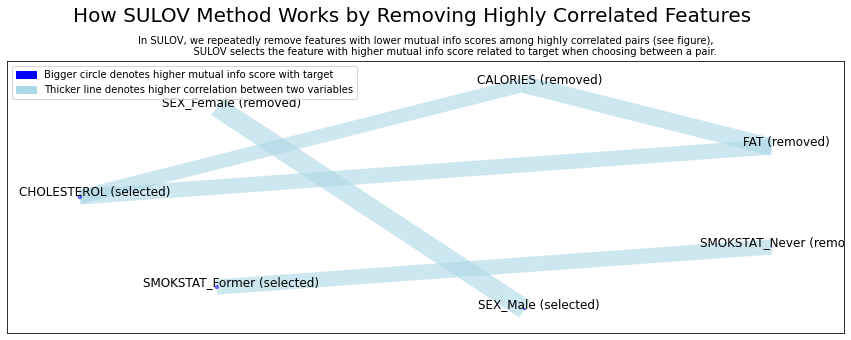

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 14
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 14 
XGBoost version: 1.5.1
Number of booster rounds = 100
        using 14 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 11 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 8 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 5 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 2 variables...
            Time taken for regular XGBoost feature selection = 1 seconds


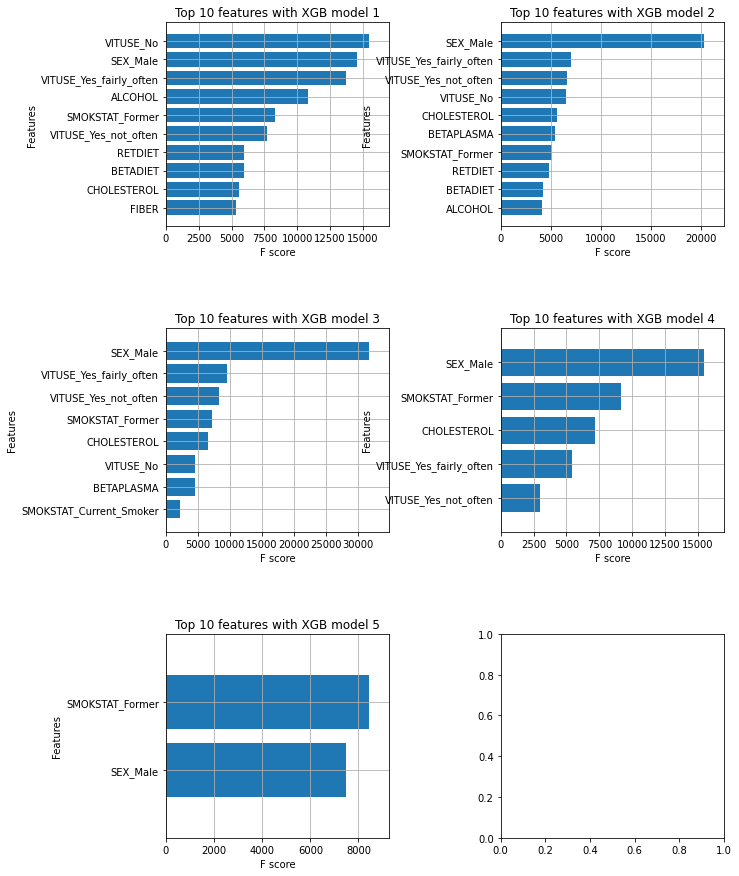

            Total time taken for XGBoost feature selection = 3 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 12 important features:
['VITUSE_No', 'SEX_Male', 'VITUSE_Yes_fairly_often', 'ALCOHOL', 'SMOKSTAT_Former', 'VITUSE_Yes_not_often', 'RETDIET', 'BETADIET', 'CHOLESTEROL', 'FIBER', 'BETAPLASMA', 'SMOKSTAT_Current_Smoker']
    Time taken = 4 seconds
Returning list of 12 important features and dataframe.
    Time taken to create entire pipeline = 4 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483


In [22]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [23]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 0 features after noise filtering
[featsel] WARNING: Not a single good features was found...
[FeatureSelector] WARNING: No good features found; returning data unchanged.


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483
1,Autofeat,1.644069e+09,1.644069e+09,1.439082


In [24]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestRegressor(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  18
Number of variables after selection:  16


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483
1,Autofeat,1.644069e+09,1.644069e+09,1.439082
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    8.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Feature importance:  [8.13609586361171, 6.915006542583937]


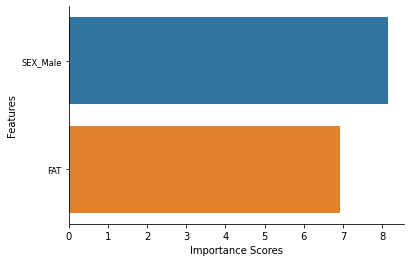

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483
1,Autofeat,1.644069e+09,1.644069e+09,1.439082
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702
3,PyImpetus,1.644069e+09,1.644069e+09,10.065838


In [25]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBR(random_state=27, cv=0, num_simul=20, simul_size=0.2, sig_test_type="non-parametric", verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [26]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483
1,Autofeat,1.644069e+09,1.644069e+09,1.439082
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702
3,PyImpetus,1.644069e+09,1.644069e+09,10.065838


In [27]:
#############################################EvolutionaryFS#############################################
##get train and test data
#data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
#columns_list=list(X.columns)

#start_evolutionaryfs = time.time()
#model_object=LinearRegression(n_jobs=-1)
#evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
#best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
#end_evolutionaryfs = time.time()
#diff = end_evolutionaryfs - start_evolutionaryfs
#len(best_columns_EvolutionaryFS)
#time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
#time_to_fit.head()

data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LinearRegression(n_jobs=-1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=mean_squared_error,average='',cost_function_improvement='decrease',columns_list=columns_list,generations=100,population=50,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 29012.747504009993 =================
================= Best performance for generation 1 : 28950.832256756148 =================
================= Best performance for generation 2 : 28845.770647432946 =================
================= Best performance for generation 3 : 28643.568984880236 =================
================= Best performance for generation 4 : 28895.219244958345 =================
================= Best performance for generation 5 : 28911.601365547664 =================
================= Best performance for generation 6 : 28439.31560642363 =================
================= Best performance for generation 7 : 28620.34466117499 =================
================= Best performance for generation 8 : 28795.086376321564 =================
================= Best performance for generation 9 : 28669.32108005237 =================
================= Best performance for generation 10 : 28472.03871907149 =================
==

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483
1,Autofeat,1.644069e+09,1.644069e+09,1.439082
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702
3,PyImpetus,1.644069e+09,1.644069e+09,10.065838
4,EvolutionaryFS,1.644069e+09,1.644069e+09,185.228926


In [28]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=mean_squared_error(y_test,model.predict(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 8797.601484713474 					 8797.601484713474 
Iteration 1 	 8752.931198771592 					 8752.931198771592 
Iteration 2 	 8199.064512954095 					 8199.064512954095 
Iteration 3 	 7677.939368974188 					 7677.939368974188 
Iteration 4 	 7927.809701609883 					 7677.939368974188 
Iteration 5 	 7387.600851198499 					 7387.600851198499 
Iteration 6 	 7486.269889860677 					 7387.600851198499 
Iteration 7 	 7387.600851198499 					 7387.600851198499 
Iteration 8 	 7387.600851198499 					 7387.600851198499 
Iteration 9 	 7031.2764884405515 					 7031.2764884405515 
Iteration 10 	 7031.2764884405515 					 7031.2764884405515 
Iteration 11 	 7381.115647738753 					 7031.2764884405515 
Iteration 12 	 7421.482667979717 					 7031.2764884405515 
Iteration 13 	 7466.639466821368 					 7031.2764884405515 
Iteration 14 	 7284.11632137315 					 7031.2764884405515 
Iteration 15 	 7415.714769556627 					 7031.27648

In [29]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = RandomForestRegressor()

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="r2",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	30    	-0.162534	0.0429148  	-0.0806904 	-0.278811  
1  	60    	-0.125358	0.0239836  	-0.0778643 	-0.172953  
2  	60    	-0.108593	0.0181191  	-0.0770733 	-0.148713  
3  	60    	-0.100008	0.0170705  	-0.0662676 	-0.135658  
4  	60    	-0.0799156	0.0172957  	-0.0484303 	-0.13063   
5  	60    	-0.0631611	0.0129851  	-0.0246989 	-0.0858068 
6  	60    	-0.0589588	0.0140343  	-0.0246989 	-0.0823203 
7  	60    	-0.0529812	0.0129956  	-0.0246989 	-0.0746418 
8  	60    	-0.0528202	0.0181077  	0.00794479 	-0.0796429 
9  	60    	-0.0438005	0.0171094  	0.00794479 	-0.0788835 
10 	60    	-0.0325354	0.0178091  	0.00794479 	-0.0622796 
11 	60    	-0.0251672	0.0161681  	0.0111417  	-0.0535166 
12 	60    	-0.0138117	0.0160351  	0.0204501  	-0.0517121 
13 	60    	-0.0123927	0.0105127  	0.0111417  	-0.0462797 
14 	60    	-0.0113628	0.0128624  	0.0111417  	-0.0372036 
15 	60    	-0.00392825	0.0137034  	0.027101   	-0.0332042 
16 	60    	0.00475

In [30]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	16
I

In [31]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

3 attributes confirmed important: ['AGE', 'BETAPLASMA', 'ALCOHOL']
15 attributes confirmed unimportant: ['CALORIES', 'SMOKSTAT_Current_Smoker', 'RETDIET', 'QUETELET', 'VITUSE_Yes_not_often', 'CHOLESTEROL', 'SMOKSTAT_Never', 'FAT', 'SEX_Male', 'SEX_Female', 'FIBER', 'VITUSE_No', 'SMOKSTAT_Former', 'BETADIET', 'VITUSE_Yes_fairly_often']
0 tentative attributes remains: []


In [41]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [42]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = KFold(n_splits=3,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [43]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,SEX_Female,SEX_Male,SMOKSTAT_Current_Smoker,SMOKSTAT_Former,SMOKSTAT_Never,VITUSE_No,VITUSE_Yes_fairly_often,VITUSE_Yes_not_often
0,70.609375,15.971545,14.592794,20.040181,10.400593,1.000000,16.211356,19.176602,13.391209,14.992933,100.0,1.0,1.0,100.0,1.0,1.0,100.0,1.0
1,89.171875,22.923212,10.352212,16.956208,38.308605,1.000000,5.370684,26.611052,7.065929,9.675618,100.0,1.0,1.0,1.0,100.0,1.0,100.0,1.0
2,30.390625,11.691603,31.687293,31.929120,48.002967,7.876355,26.260487,65.127387,10.077281,23.948410,100.0,1.0,1.0,100.0,1.0,1.0,1.0,100.0
3,33.484375,26.596785,32.916632,38.141761,69.741840,1.243842,34.829780,9.894039,13.016591,11.704594,100.0,1.0,1.0,100.0,1.0,100.0,1.0,1.0
4,82.984375,14.522351,24.995995,31.482167,39.483680,1.000000,16.268714,28.816186,17.987484,7.436749,100.0,1.0,1.0,1.0,100.0,1.0,100.0,1.0


In [44]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [45]:
from xgboost import XGBRegressor
model1 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,random_state=99)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='neg_mean_squared_error', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[-36935.49993098 -59249.1190969  -51231.62339884]
Mean Score for all features = -49138.74747557228


##  Here we run Cross Validation and get accuracy metrics for each technique

In [46]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = KFold(n_splits=3,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit.head()

[-70337.56564957 -55298.87483696 -49449.52412692]
Mean Score for FeatureWiz = -58361.9882044825
[-66462.53253843 -57120.37201418 -51330.13991431]
Mean Score for Autofeat = -58304.34815564085
[-68621.63280205 -60685.42931867 -50077.42967063]
Mean Score for FeatureEngine = -59794.830597116605
[ -93382.19155376 -102415.56484694  -86132.21228638]
Mean Score for PyImpetus = -93976.65622902474
[-70422.12465357 -63023.55511891 -59958.72640765]
Mean Score for EvolutionaryFS = -64468.13539337562
[-68330.68083645 -56332.82016215 -46634.5633419 ]
Mean Score for Zoof = -57099.3547801664
[-57508.71050436 -56492.50733315 -59756.92892014]
Mean Score for Genetic OPT = -57919.38225255107
[ -74080.43366291  -87695.82048853 -103159.2706101 ]
Mean Score for BorutaPy = -88311.8415871795
[-64221.23063775 -52018.59795878 -59487.78265815]
Mean Score for BorutaShap = -58575.87041822705


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483,-58361.988204,35862.051665,Plasma Retinol,Regression,Mean Squared Error
1,Autofeat,1.644069e+09,1.644069e+09,1.439082,-58304.348156,NaN,Plasma Retinol,Regression,Mean Squared Error
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702,-59794.830597,NaN,Plasma Retinol,Regression,Mean Squared Error
3,PyImpetus,1.644069e+09,1.644069e+09,10.065838,-93976.656229,69600.067111,Plasma Retinol,Regression,Mean Squared Error
4,EvolutionaryFS,1.644069e+09,1.644069e+09,185.228926,-64468.135393,39503.177752,Plasma Retinol,Regression,Mean Squared Error


## You must finally train a model on X_train and test it on X_test using selected features

In [47]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    #print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = -mean_squared_error(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

In [48]:
time_to_fit['Mean_CV_Accuracy'] = time_to_fit['Mean_CV_Accuracy'].abs()
time_to_fit['Mean_Test_Accuracy'] = time_to_fit['Mean_Test_Accuracy'].abs()
time_to_fit['Dataset'] = "Plasma Retinol"
time_to_fit['Type'] = "Regression"
time_to_fit['Metric'] = "Mean Squared Error"

In [49]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.644069e+09,1.644069e+09,4.531483,58361.988204,35862.051665,Plasma Retinol,Regression,Mean Squared Error
1,Autofeat,1.644069e+09,1.644069e+09,1.439082,58304.348156,32130.478586,Plasma Retinol,Regression,Mean Squared Error
2,FeatureEngine,1.644069e+09,1.644069e+09,0.489702,59794.830597,38964.833204,Plasma Retinol,Regression,Mean Squared Error
3,PyImpetus,1.644069e+09,1.644069e+09,10.065838,93976.656229,69600.067111,Plasma Retinol,Regression,Mean Squared Error
4,EvolutionaryFS,1.644069e+09,1.644069e+09,185.228926,64468.135393,39503.177752,Plasma Retinol,Regression,Mean Squared Error
5,Zoof,1.644069e+09,1.644069e+09,185.228926,57099.354780,35737.356979,Plasma Retinol,Regression,Mean Squared Error
6,Genetic OPT,1.644069e+09,1.644070e+09,662.849161,57919.382253,43577.221405,Plasma Retinol,Regression,Mean Squared Error
7,BorutaPy,1.644070e+09,1.644070e+09,27.648252,88311.841587,60745.349051,Plasma Retinol,Regression,Mean Squared Error
8,BorutaShap,1.644070e+09,1.644070e+09,264.303516,58575.870418,39097.007636,Plasma Retinol,Regression,Mean Squared Error


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus